<h2>In-class transcript from Lecture 7, January 30, 2019</h2> 


# Imports and defs for lecture

In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk

In [2]:
def Usolve(U, y, unit_diag = False):
    """Backward solve an upper triangular system Ux = y for x
    Parameters: 
      U: the matrix, must be square, upper triangular, with nonzeros on the diagonal
      y: the right-hand side vector
      unit_diag = False: if true, assume the diagonal is all ones
    Output:
      x: the solution vector to U @ x == y
    """
    # Check the input
    m, n = U.shape
    assert m == n, "matrix must be square"
    assert np.all(np.triu(U) == U), "matrix U must be upper triangular"
    if unit_diag:
        assert np.all(np.diag(U) == 1), "matrix U must have ones on the diagonal"
    yn, = y.shape
    assert yn == n, "rhs vector must be same size as U"
    
    # Make a copy of y that we will transform into the solution
    x = y.astype(np.float64).copy()
    
    # Back solve
    for col in reversed(range(n)):
        if not unit_diag:
            x[col] /= U[col, col]
        x[:col] -= x[col] * U[:col, col]
        
    return x

# Lecture starts here

In [3]:
# Heath surveyor problem

A = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
b = np.array([1237,1941,2417,711,1177,475])
print('A:'); print(A)
print('\nB:', b)

A:
[[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [-1  1  0]
 [-1  0  1]
 [ 0 -1  1]]

B: [1237 1941 2417  711 1177  475]


In [4]:
Q, R = linalg.qr(A, mode='economic')

print('Q:', Q.shape); print(Q)
print('\nR:', R.shape); print(R)

Q: (6, 3)
[[-5.77350269e-01 -2.04124145e-01 -3.53553391e-01]
 [-0.00000000e+00 -6.12372436e-01 -3.53553391e-01]
 [-0.00000000e+00 -0.00000000e+00 -7.07106781e-01]
 [ 5.77350269e-01 -4.08248290e-01  3.70430685e-17]
 [ 5.77350269e-01  2.04124145e-01 -3.53553391e-01]
 [-0.00000000e+00  6.12372436e-01 -3.53553391e-01]]

R: (3, 3)
[[-1.73205081  0.57735027  0.57735027]
 [ 0.         -1.63299316  0.81649658]
 [ 0.          0.         -1.41421356]]


In [5]:
npla.norm(Q @ R - A)

4.458965305937306e-16

In [6]:
x = Usolve(R, Q.T @ b)
x

array([1236., 1943., 2416.])

In [7]:
b - A @ x

array([ 1., -2.,  1.,  4., -3.,  2.])

In [8]:
x, resid, rank, sv = npla.lstsq(A, b, rcond = None)

In [9]:
x

array([1236., 1943., 2416.])

In [10]:
resid

array([35.])

In [12]:
npla.norm(b - A @ x)

5.916079783099616

In [13]:
rank

3

In [15]:
x = npla.lstsq(A, b, rcond = None)[0]
x

array([1236., 1943., 2416.])

In [16]:
# parabola

In [17]:
t = np.array(range(21))/2
y = np.array([2.9, 2.7, 4.8, 5.3, 7.1, 7.6, 7.7, 7.6, 9.4, 9.0, 9.6, 
              10.0, 10.2, 9.7, 8.3, 8.4, 9.0, 8.3, 6.6, 6.7, 4.1])
print('t:',t)
print('y:',y)

t: [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
y: [ 2.9  2.7  4.8  5.3  7.1  7.6  7.7  7.6  9.4  9.   9.6 10.  10.2  9.7
  8.3  8.4  9.   8.3  6.6  6.7  4.1]


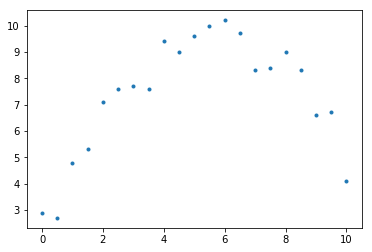

In [18]:
%matplotlib inline
plt.figure()
plt.plot(t,y,'.')

In [19]:
m = len(y)
A = np.ones((m,3))
A[:,1] = t
A[:,2] = t**2
A

array([[  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  1.  ,   5.  ,  25.  ],
       [  1.  ,   5.5 ,  30.25],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,   6.5 ,  42.25],
       [  1.  ,   7.  ,  49.  ],
       [  1.  ,   7.5 ,  56.25],
       [  1.  ,   8.  ,  64.  ],
       [  1.  ,   8.5 ,  72.25],
       [  1.  ,   9.  ,  81.  ],
       [  1.  ,   9.5 ,  90.25],
       [  1.  ,  10.  , 100.  ]])

In [20]:
x = npla.lstsq(A, y, rcond = None)[0]
x

array([ 2.17571993,  2.67041339, -0.23844394])

In [23]:
r = y - A @ x
r
npla.norm(r)/npla.norm(y)

0.07384248666934154

In [24]:
np.linspace(0,10,5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

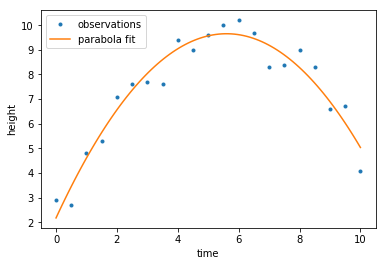

In [29]:
%matplotlib inline
plt.figure()
plt.plot(t,y,'.')
polyt = np.linspace(0,10,num=100)
polyy = x[0] + x[1]*polyt + x[2]*polyt**2
plt.plot(polyt,polyy)
plt.xlabel('time')
plt.ylabel('height')
plt.legend(('observations', 'parabola fit'))